In [1]:
import pandas as pd
import cv2
import numpy as np
import torch
import albumentations
import matplotlib.pyplot as plt
import os
import sys
import glob
import math

In [2]:
dataset_dir = "./Dataset/"

In [3]:
print(os.listdir(dataset_dir))

['box_coordinates.csv', 'Dataset.zip', 'face_extracted', 'Test Tom and Jerry.mp4', 'Test.csv', 'test_count.csv', 'test_frames', 'Train Tom and jerry.mp4', 'Train.csv', 'train_corrected.csv', 'train_count.csv', 'train_frames']


In [4]:
for file in glob.glob(dataset_dir+"*.csv"):
    print(file)
    df = pd.read_csv(file)
    print("DataFrame Shape: ",df.shape)
    print("Head:\n",df.head())
    print("\n\n\n\n")

./Dataset\Test.csv
DataFrame Shape:  (186, 1)
Head:
     Frame_ID
0  test0.jpg
1  test1.jpg
2  test2.jpg
3  test3.jpg
4  test4.jpg





./Dataset\Train.csv
DataFrame Shape:  (298, 2)
Head:
      Frame_ID    Emotion
0  frame0.jpg      happy
1  frame1.jpg      happy
2  frame2.jpg  surprised
3  frame3.jpg  surprised
4  frame4.jpg      angry







In [5]:
df_train = pd.read_csv(dataset_dir+"Train.csv")
print("Value Counts:\n", df_train.Emotion.value_counts())

Value Counts:
 Unknown      116
surprised     68
sad           40
angry         37
happy         37
Name: Emotion, dtype: int64


In [6]:
cap = cv2.VideoCapture(dataset_dir+"Train Tom and jerry.mp4")
print("Frame Rate Train Video: ", cap.get(5) )

Frame Rate Train Video:  30.0


In [7]:
cap = cv2.VideoCapture(dataset_dir+"Test Tom and Jerry.mp4")
print("Frame Rate Test Video: ", cap.get(5) )

Frame Rate Test Video:  29.97002997002997


In [8]:
#Generating Frame Images
if not os.path.exists(dataset_dir + "train_frames"):
    os.mkdir(dataset_dir + "train_frames")
if not os.path.exists(dataset_dir + "test_frames"):
    os.mkdir(dataset_dir + "test_frames")

In [9]:
saveFolder = dataset_dir + "train_frames/"
cap = cv2.VideoCapture(dataset_dir+"Train Tom and jerry.mp4")
frameRate = cap.get(5)
i=0
count = 0
while(cap.isOpened()):
    cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    count += math.floor(frameRate)
    ret, frame = cap.read()
    if (ret != True) or cv2.waitKey(1) & 0xFF == ord('q') or count>=8912:
        break
    cv2.imwrite(saveFolder+"frame"+str(i)+".jpg",frame)
    i+=1
cap.release()
cv2.destroyAllWindows()

In [10]:
saveFolder = dataset_dir + "test_frames/"
cap = cv2.VideoCapture(dataset_dir+"Test Tom and Jerry.mp4")
frameRate = cap.get(5)
i=0
count = 0
while(cap.isOpened()):
    cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    count += math.floor(frameRate)
    ret, frame = cap.read()
    if (ret != True) or cv2.waitKey(1) & 0xFF == ord('q') or count>=8912:
        break

    cv2.imwrite(saveFolder+"test"+str(i)+".jpg",frame)
    i+=1
cap.release()
cv2.destroyAllWindows()

In [11]:
print(len(os.listdir(dataset_dir+"train_frames")))
print(len(os.listdir(dataset_dir+"test_frames")))

297
186


Frame_ID    Emotion
94  frame94.jpg        sad
95  frame94.jpg  surprised


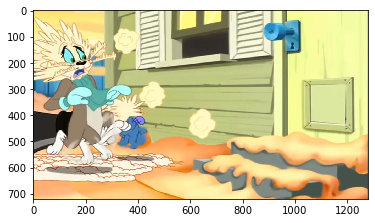

In [12]:
df_train = pd.read_csv(dataset_dir+"Train.csv")
print(df_train[df_train.Frame_ID == "frame94.jpg"])
plt.imshow(cv2.imread(dataset_dir + "train_frames/frame94.jpg"))

In [16]:
df_train.drop_duplicates(subset=["Frame_ID"], inplace = True)
df_train.at[94, "Emotion"] = "surprised"

In [17]:
print(df_train[df_train.Frame_ID == "frame94.jpg"])

Frame_ID    Emotion
94  frame94.jpg  surprised


In [18]:
df_train.to_csv(dataset_dir+"train_corrected.csv", index = False)

In [19]:
df_train = pd.read_csv(dataset_dir + "train_corrected.csv")

In [20]:
df_train.Emotion.value_counts()

Unknown      116
surprised     68
sad           39
happy         37
angry         37
Name: Emotion, dtype: int64

In [4]:
box = pd.read_csv(dataset_dir + "box_coordinates.csv")

In [5]:
df = box[box.score == 100]

In [10]:
cols = list(df.columns)
cols[1],cols[3] = cols[3], cols[1]
cols[2],cols[4] = cols[4], cols[2]
df.columns = cols

In [12]:
box = box[box.score != 100]
box = box.append(df)

In [15]:
box[box.score == 100].head()

,img_name,score,xmax,xmin,ymax,ymin
2,frame10.jpg,100.0,143,95,258,195
4,frame101.jpg,100.0,136,85,145,78
34,frame129.jpg,100.0,183,133,150,82
40,frame134.jpg,100.0,208,176,147,115
47,frame140.jpg,100.0,152,121,158,108


In [16]:
box.to_csv(dataset_dir + "box_coordinates.csv", index = False)